<a href="https://colab.research.google.com/github/O-orion/Dash-Marketing/blob/main/analise_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash dash-bootstrap-components pyngrok

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pyngrok import ngrok
from dash import Dash, html, dcc, Input, Output
import dash_bootstrap_components as dbc
from threading import Thread
import nest_asyncio
import time

In [3]:
base = pd.read_csv('marketing_campaign.csv', sep="\t");

In [4]:
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
base = base.dropna()

In [6]:
base['Age'] = 2025 - base['Year_Birth']

/tmp/ipython-input-6-2764877260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Age'] = 2025 - base['Year_Birth']


In [7]:
base = base[base['Age'] < 100]

In [8]:
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44


In [9]:
base = base.drop(columns=['ID', 'Year_Birth','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Z_CostContact', 'Z_Revenue' ])


In [10]:
base.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,88,88,3,8,10,4,7,0,1,68
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,1,6,2,1,1,2,5,0,0,71
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,21,42,1,8,2,10,4,0,0,60
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,3,5,2,2,0,4,6,0,0,41
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,27,15,5,5,3,6,5,0,0,44


In [11]:
base['Dt_Customer'] = pd.to_datetime(base['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
base['Years_As_Customer'] = (pd.Timestamp.now() - base['Dt_Customer']).dt.days / 365.25

In [12]:
base = base.drop(columns=['Dt_Customer'])

In [13]:
base.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Years_As_Customer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,0,1,68,12.859685
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,0,0,71,11.353867
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,0,0,60,11.898700
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,0,0,41,11.425051
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,0,0,44,11.485284


In [14]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

#tira grid do gráficos
sns.set_style("whitegrid")



/tmp/ipython-input-15-1416884144.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response = base.groupby('Age_Group')['Response'].mean().reset_index()
/tmp/ipython-input-15-1416884144.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Response', data=age_response, palette='flare')


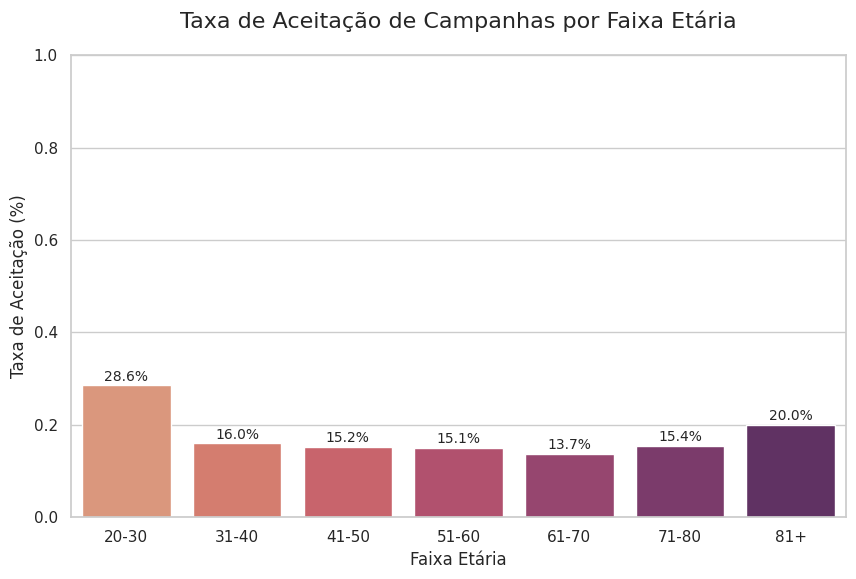

In [15]:
base['Total_Spent'] = (base['MntWines'] + base['MntFruits'] + base['MntMeatProducts'] + base['MntFishProducts'] + base['MntSweetProducts'] + base['MntGoldProds'])

base['Age_Group'] = pd.cut(base['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 100],
                           labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

age_response = base.groupby('Age_Group')['Response'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Response', data=age_response, palette='flare')
plt.title('Taxa de Aceitação de Campanhas por Faixa Etária', fontsize=16, pad=20)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(age_response['Response']):
    plt.text(i, v + 0.01, f'{v*100:.1f}%', ha='center', fontsize=10)
plt.savefig('age_response.png', dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipython-input-16-3386491429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = base.groupby('Age_Group')['Total_Spent'].mean().reset_index()
/tmp/ipython-input-16-3386491429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Total_Spent', data=age_spending, palette='Spectral')


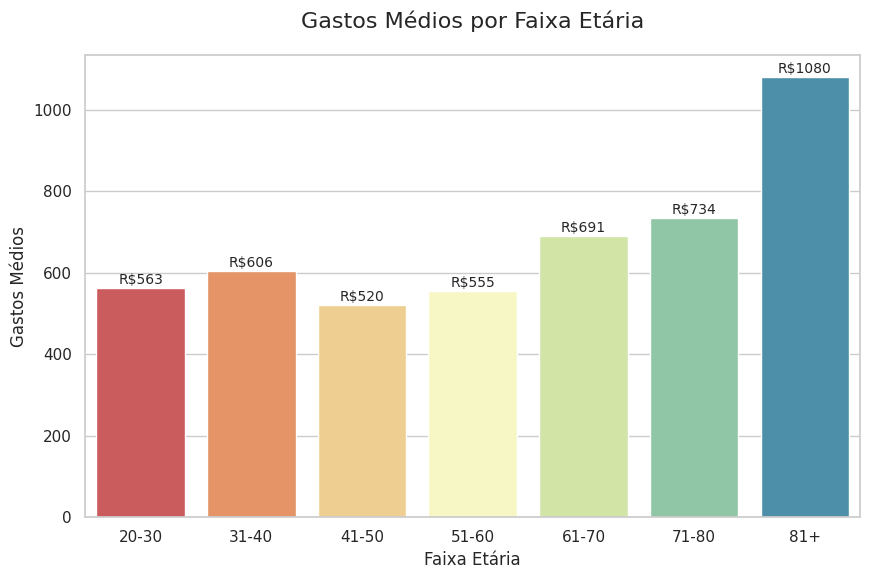

In [16]:
age_spending = base.groupby('Age_Group')['Total_Spent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total_Spent', data=age_spending, palette='Spectral')
plt.title('Gastos Médios por Faixa Etária', pad=20, fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Gastos Médios', fontsize=12)
for i, v in enumerate(age_spending['Total_Spent']):
    plt.text(i, v + 10, f'R${v:.0f}', ha='center', fontsize=10)
plt.show()


/tmp/ipython-input-17-4020082240.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ternure_response = base.groupby('Customer_Ternure')['Response'].mean().reset_index()
/tmp/ipython-input-17-4020082240.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Ternure', y='Response', data=ternure_response, palette='rocket')


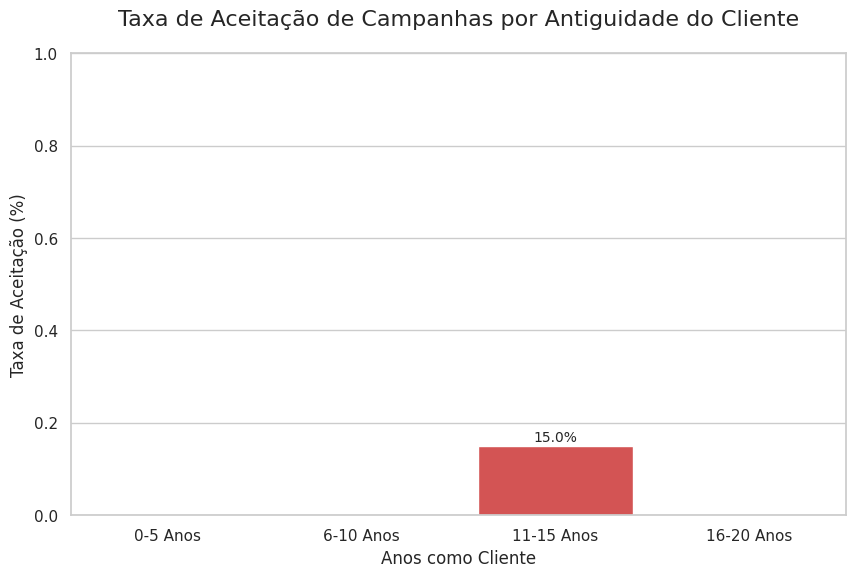

In [17]:
base['Customer_Ternure'] = pd.cut(base['Years_As_Customer'], bins=[0,5,10,15,20], labels=['0-5 Anos', '6-10 Anos', '11-15 Anos', '16-20 Anos'])

ternure_response = base.groupby('Customer_Ternure')['Response'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Customer_Ternure', y='Response', data=ternure_response, palette='rocket')
plt.title('Taxa de Aceitação de Campanhas por Antiguidade do Cliente', fontsize=16, pad=20)
plt.xlabel('Anos como Cliente', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(ternure_response['Response']):
    plt.text(i, v + 0.01, f'{v*100:.1f}%', ha='center', fontsize=10)
plt.savefig('tenure_response.png', dpi=300, bbox_inches='tight')
plt.show()



/tmp/ipython-input-18-1579377076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_marital = base.groupby(['Marital_Status', pd.cut(base['Income'], bins=[0, 30000, 60000, 100000, 200000],


<Figure size 1200x800 with 0 Axes>

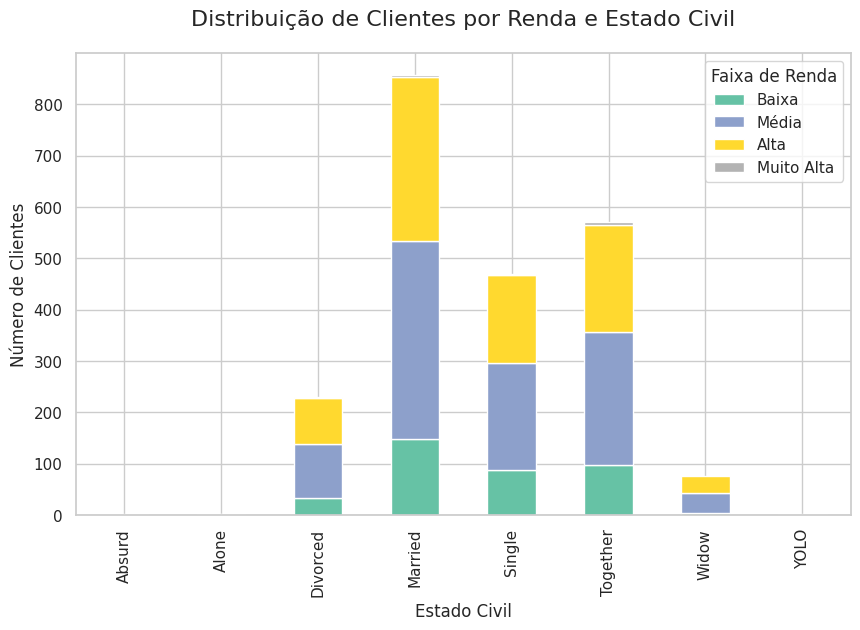

In [18]:
income_marital = base.groupby(['Marital_Status', pd.cut(base['Income'], bins=[0, 30000, 60000, 100000, 200000],
                                                       labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])]).size().unstack()

plt.figure(figsize=(12, 8))
income_marital.plot(kind='bar', stacked=True, cmap='Set2')
plt.title('Distribuição de Clientes por Renda e Estado Civil', fontsize=16, pad=20)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Faixa de Renda')
plt.show()

/tmp/ipython-input-19-820729620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Canal', y='Média de Compras', data=channels, palette='Oranges_d')


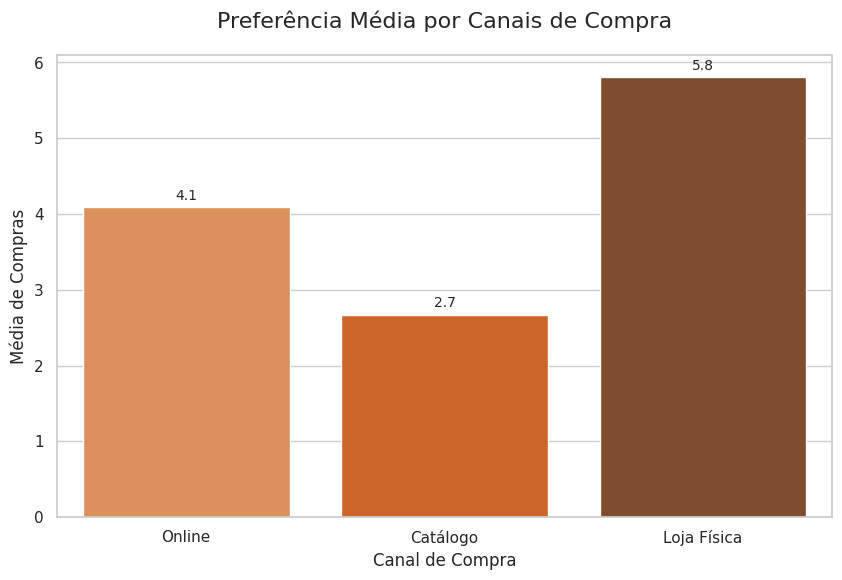

In [19]:
channels = base[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean().reset_index()
channels.columns = ['Canal', 'Média de Compras']
channels['Canal'] = ['Online', 'Catálogo', 'Loja Física']

plt.figure(figsize=(10, 6))
sns.barplot(x='Canal', y='Média de Compras', data=channels, palette='Oranges_d')
plt.title('Preferência Média por Canais de Compra', fontsize=16, pad=20)
plt.xlabel('Canal de Compra', fontsize=12)
plt.ylabel('Média de Compras', fontsize=12)
for i, v in enumerate(channels['Média de Compras']):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', fontsize=10)
plt.show()

/tmp/ipython-input-20-1194759863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complain', y='Response', data=complain_response, palette='Reds_d')


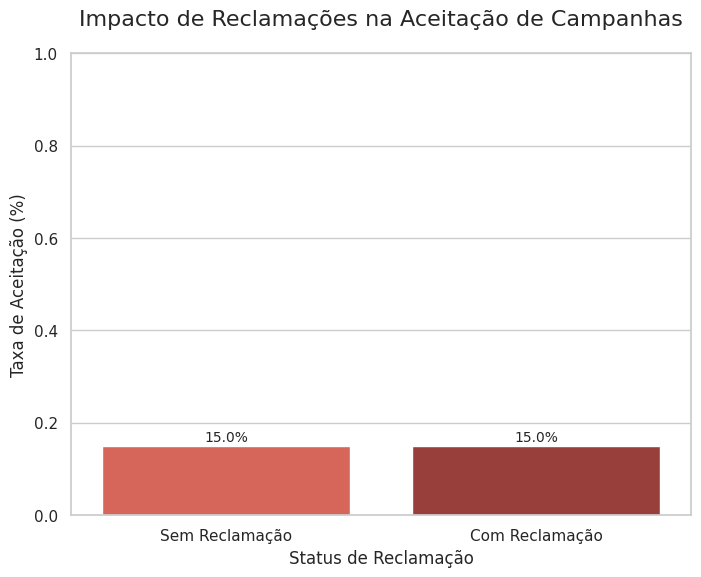

In [20]:
complain_response = base.groupby('Complain')['Response'].mean().reset_index()
complain_response['Complain'] = complain_response['Complain'].map({0: 'Sem Reclamação', 1: 'Com Reclamação'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Complain', y='Response', data=complain_response, palette='Reds_d')
plt.title('Impacto de Reclamações na Aceitação de Campanhas', fontsize=16, pad=20)
plt.xlabel('Status de Reclamação', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate(complain_response['Response']):
    plt.text(i, v + 0.01, f'{v*100:.1f}%', ha='center', fontsize=10)
plt.show()

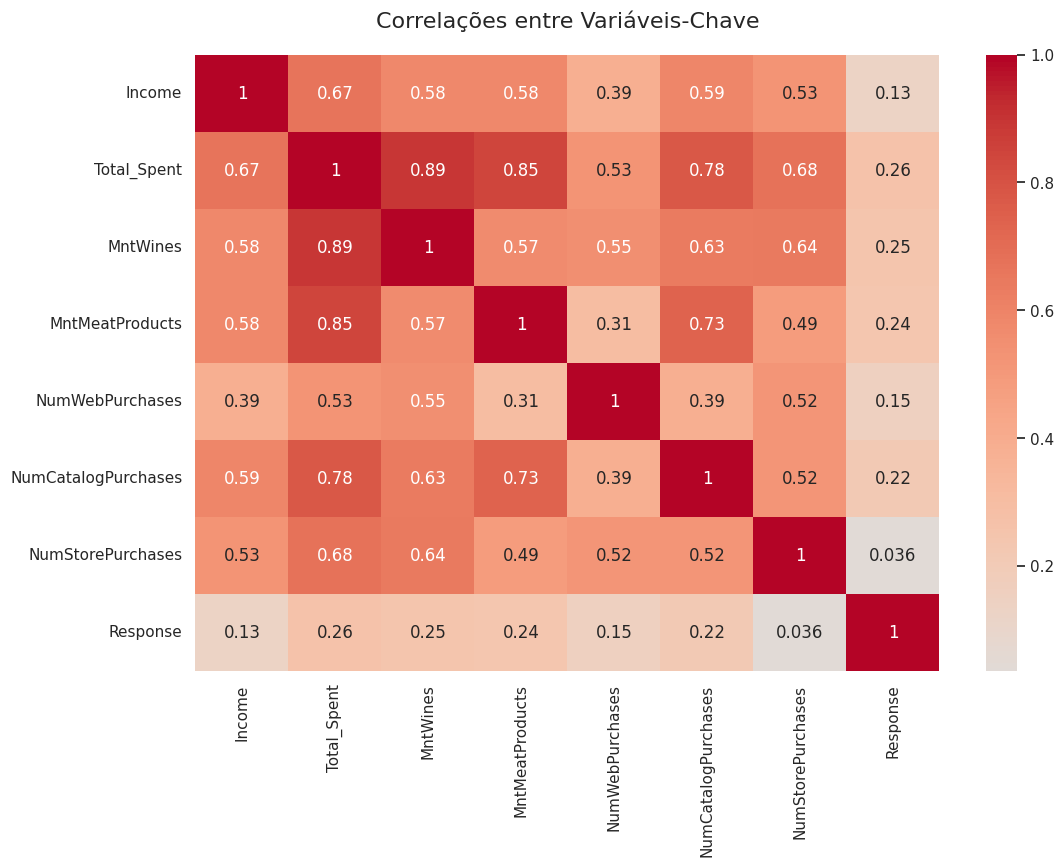

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(base[['Income', 'Total_Spent', 'MntWines', 'MntMeatProducts', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'Response']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlações entre Variáveis-Chave', fontsize=16, pad=20)
plt.show()

In [22]:
df = base.copy()

df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 100],
                         labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

df['Faixa_Renda'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 100000, 200000],
                           labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])

df['Tem_Criancas'] = (df['Kidhome'] + df['Teenhome']) > 0

df['Faixa_Tempo'] = pd.cut(df['Years_As_Customer'], bins=[0, 5, 10, 15, 20],
                           labels=['0-5 anos', '6-10 anos', '11-15 anos', '16-20 anos'])

df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

app = Dash(__name__, external_stylesheets=[dbc.themes.CYBORG])

def produtos_mais_comprados(df):
    produtos = {
        'Vinhos': df['MntWines'].sum(),
        'Carnes': df['MntMeatProducts'].sum(),
        'Peixes': df['MntFishProducts'].sum(),
        'Doces': df['MntSweetProducts'].sum(),
        'Frutas': df['MntFruits'].sum(),
        'Ouro': df['MntGoldProds'].sum()
    }
    df_produtos = pd.DataFrame(list(produtos.items()), columns=['Produto', 'Total'])
    fig = px.bar(df_produtos, x='Produto', y='Total', title='Produtos Mais Comprados', color='Total',
                 color_continuous_scale='Tealgrn')
    fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
    return fig

def distribuicao_idade(df):
    fig = px.histogram(df, x='Age', nbins=20, title='Distribuição de Idade dos Clientes',
                       color_discrete_sequence=['indianred'])
    fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
    return fig

app.layout = dbc.Container([
    html.H2("Dashboard de Marketing", className="text-center my-4"),

    dbc.Row([
        dbc.Col([
            html.Label("Faixa Etária"),
            dcc.Dropdown(
                options=[{'label': age, 'value': age} for age in df['Age_Group'].dropna().unique()],
                id='age_filter', placeholder="Selecione"
            )
        ], width=4),

        dbc.Col([
            html.Label("Estado Civil"),
            dcc.Dropdown(
                options=[{'label': m, 'value': m} for m in df['Marital_Status'].unique()],
                id='marital_filter', placeholder="Selecione"
            )
        ], width=4),

        dbc.Col([
            html.Label("Faixa de Renda"),
            dcc.Dropdown(
                options=[{'label': r, 'value': r} for r in df['Faixa_Renda'].dropna().unique()],
                id='income_filter', placeholder="Selecione"
            )
        ], width=4),
    ]),

    dbc.Row([
        dbc.Col([
            html.Label("Nível de Educação"),
            dcc.Dropdown(
                options=[{'label': e, 'value': e} for e in df['Education'].unique()],
                id='education_filter', placeholder="Selecione"
            )
        ], width=4),

        dbc.Col([
            html.Label("Tem Crianças"),
            dcc.Dropdown(
                options=[{'label': 'Sim', 'value': True}, {'label': 'Não', 'value': False}],
                id='kids_filter', placeholder="Selecionar"
            )
        ], width=4),

        dbc.Col([
            html.Label("Reclamou"),
            dcc.Dropdown(
                options=[{'label': 'Sim', 'value': 1}, {'label': 'Não', 'value': 0}],
                id='complain_filter', placeholder="Selecionar"
            )
        ], width=4),
    ]),

    dbc.Row([
        dbc.Col([
            html.Label("Tempo como Cliente"),
            dcc.Dropdown(
                options=[{'label': t, 'value': t} for t in df['Faixa_Tempo'].dropna().unique()],
                id='years_filter', placeholder="Selecionar"
            )
        ], width=4),
    ]),

    html.Hr(),

    dbc.Row([
        dbc.Col(dcc.Graph(id='gasto_faixa'), width=6),
        dbc.Col(dcc.Graph(id='resposta_faixa'), width=6)
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='canais_compra'), width=6),
        dbc.Col(dcc.Graph(id='heatmap_correlacao'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='produtos_comprados'), width=6),
        dbc.Col(dcc.Graph(id='idade_dist'), width=6),
    ])
], fluid=True)

@app.callback(
    Output('gasto_faixa', 'figure'),
    Output('resposta_faixa', 'figure'),
    Output('canais_compra', 'figure'),
    Output('heatmap_correlacao', 'figure'),
    Output('produtos_comprados', 'figure'),
    Output('idade_dist', 'figure'),
    Input('age_filter', 'value'),
    Input('marital_filter', 'value'),
    Input('income_filter', 'value'),
    Input('education_filter', 'value'),
    Input('kids_filter', 'value'),
    Input('complain_filter', 'value'),
    Input('years_filter', 'value')
)
def update_graphs(age_group, marital_status, income_group, education, kids, complain, years_group):
    df_filtered = df.copy()

    if age_group: df_filtered = df_filtered[df_filtered['Age_Group'] == age_group]
    if marital_status: df_filtered = df_filtered[df_filtered['Marital_Status'] == marital_status]
    if income_group: df_filtered = df_filtered[df_filtered['Faixa_Renda'] == income_group]
    if education: df_filtered = df_filtered[df_filtered['Education'] == education]
    if kids is not None: df_filtered = df_filtered[df_filtered['Tem_Criancas'] == kids]
    if complain is not None: df_filtered = df_filtered[df_filtered['Complain'] == complain]
    if years_group: df_filtered = df_filtered[df_filtered['Faixa_Tempo'] == years_group]

    gasto = df_filtered.groupby('Age_Group')['Total_Spent'].mean().reset_index()
    fig1 = px.bar(gasto, x='Age_Group', y='Total_Spent', title='Gastos Médios por Faixa Etária', color='Total_Spent', text='Total_Spent')
    fig1.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white', yaxis_title="Gasto Médio R$")
    fig1.update_xaxes(title="Faixa Etária")
    fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig1.update_yaxes(showgrid=False)

    taxa = df_filtered.groupby('Age_Group')['Response'].mean().reset_index()
    fig2 = px.bar(taxa, x='Age_Group', y='Response', title='Taxa de Aceitação por Faixa Etária', color='Response', text='Response')
    fig2.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white', yaxis_title="Taxa de Aceitação %")
    fig2.update_xaxes(title="Faixa Etária")
    fig2.update_traces(texttemplate='%{text:.1%}', textposition='outside')
    fig2.update_yaxes(showgrid=False)

    canais = {
        'Online': df_filtered['NumWebPurchases'].mean(),
        'Catálogo': df_filtered['NumCatalogPurchases'].mean(),
        'Loja Física': df_filtered['NumStorePurchases'].mean()
    }
    canais_df = pd.DataFrame(list(canais.items()), columns=['Canal', 'Média'])
    fig3 = px.bar(canais_df, x='Canal', y='Média', title='Compras por Canal', color='Média')
    fig3.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
    fig3.update_yaxes(showgrid=False)

    correl = df_filtered[['Income', 'Total_Spent', 'MntWines', 'MntMeatProducts',
                          'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response']].corr()
    fig4 = px.imshow(correl, text_auto=True, title='Mapa de Correlação')
    fig4.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')

    fig5 = produtos_mais_comprados(df_filtered)
    fig5.update_yaxes(showgrid=False)
    fig6 = distribuicao_idade(df_filtered)
    fig6.update_yaxes(showgrid=False)

    return fig1, fig2, fig3, fig4, fig5, fig6


In [23]:
!ngrok config add-authtoken

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:

nest_asyncio.apply()

def run_dash():
    app.run(host="0.0.0.0", port=8050, debug=False)

thread = Thread(target=run_dash)
thread.start()

time.sleep(3)

public_url = ngrok.connect("http://localhost:8050")
print(f"🔗 Acesse seu dashboard aqui: {public_url}")


<IPython.core.display.Javascript object>

🔗 Acesse seu dashboard aqui: NgrokTunnel: "https://d82cd24eb8e5.ngrok-free.app" -> "http://localhost:8050"
